<a href="https://colab.research.google.com/github/Meder22/index/blob/Pandas/pandas_df_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задача 1

Перед вами сгенеренные массивы данных по пользователям сотового оператора. Создайте датафрейм с автоматической индексацией любым способом, который будет иметь колонки:

* `id` - уникальный ID абонента

* `age` - возраст абонента

* `calls_month` - среднее количество звонков, совершаемое абонентом в месяц

* `city` - город проживания



---
Проверьте ID на предмет возможных ошибок. Какого рода такие ошибки могут быть?

Выведите его размерность и описательные статистики.

Покажите графически, есть ли какая-либо взаимосвязь двух признаков
* `age`
* `calls_month`

In [6]:
n_rows = 500 # количество строк

id = 'ID_' + pd.Series(np.random.choice(range(1000, 2001), size=n_rows, replace=False)).astype(str)
age = pd.Series(np.random.randint(10, 65, n_rows))
calls_month = (0.2* (age-30)**2 + 40 + np.random.randn(n_rows)*30).round().astype(int)
city = [['Bishkek', 'Ohs', 'Naryn', 'Batken', 'Tokmak'][i] for i in np.random.randint(0, 5, n_rows)]

columns = ['id', 'age', 'calls_month', 'city']
data = [id, age, calls_month, city]

In [7]:
# your code

In [8]:
df = pd.DataFrame(np.array(data).T, columns=columns)
df

,id,age,calls_month,city
0,ID_1129,61,238,Bishkek
1,ID_1682,40,53,Naryn
2,ID_1646,30,33,Bishkek
3,ID_1414,61,212,Tokmak
4,ID_1978,26,12,Ohs
...,...,...,...,...
495,ID_1546,64,266,Ohs
496,ID_1796,60,258,Tokmak
497,ID_1581,23,61,Batken
498,ID_1863,13,104,Batken


In [11]:
df.id.map(lambda i: len(i)).unique()

array([7])

In [13]:
df.id.unique().shape

(500,)

In [14]:
df.shape

(500, 4)

In [19]:
df.age = df.age.astype(np.int64)
df.calls_month = df.calls_month.astype(np.int32)

In [20]:
df.describe()

,age,calls_month
count,500.000000,500.000000
mean,36.890000,102.356000
std,15.998556,72.657743
min,10.000000,-32.000000
25%,23.000000,51.000000
50%,35.500000,82.500000
75%,51.000000,139.500000
max,64.000000,340.000000


In [23]:
for col in df.columns:
  print(df[col].dtype == 'object')

True
False
False
True


<Axes: xlabel='age', ylabel='calls_month'>

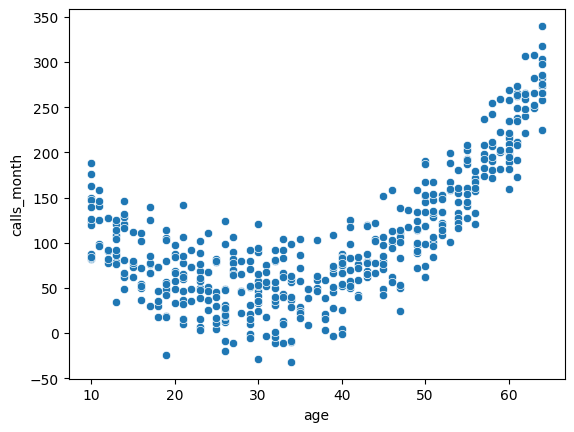

In [26]:
sns.scatterplot(x = df.age, y = df.calls_month)

<Axes: xlabel='age', ylabel='calls_month'>

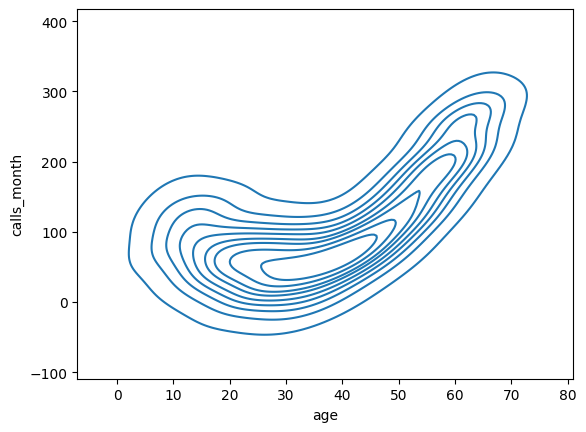

In [27]:
sns.kdeplot(x = df.age,y = df.calls_month)

Создадим колонку `balance` которая будет скоррелирована с количеством звонков в месяц. Данная фича будет показывать средний баланс за месяц для абонента. Ниже написана очень импирическая формула (не показывайте ее никому), как можно по одному множеству сгенерить другое множество с заданным коэффициентом корреляции. Сплошная эвристика)))

$$Y = rX + E\sigma_x\sqrt{1-r^2} + bias$$

* Y - получаемое множество
* X - исходное множество
* E - случайный шум (стандартизированное Гаусово распределение)
* r - коэффициент Корреляции Пирсона
* bias - смещение

In [28]:
r = 0.7
e = np.random.randn(n_rows)
bias = 200
balance = (df.calls_month * r + e*(1-r**2)**.5* df.calls_month.std() + bias).round()

In [29]:
# your code
df['balance'] = balance

In [30]:
df.head()

,id,age,calls_month,city,balance
0,ID_1129,61,238,Bishkek,404.0
1,ID_1682,40,53,Naryn,252.0
2,ID_1646,30,33,Bishkek,226.0
3,ID_1414,61,212,Tokmak,307.0
4,ID_1978,26,12,Ohs,198.0


<Axes: xlabel='balance', ylabel='calls_month'>

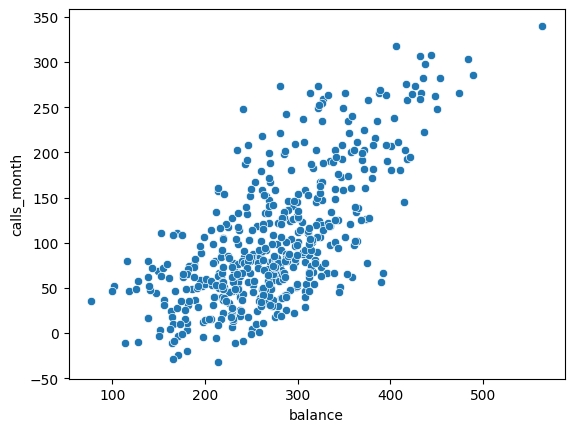

In [31]:
sns.scatterplot(x = df.balance, y = df.calls_month)

Постройте скаттерплот и корр матрицу.

Постройте график по образцу и сделайте выводы.

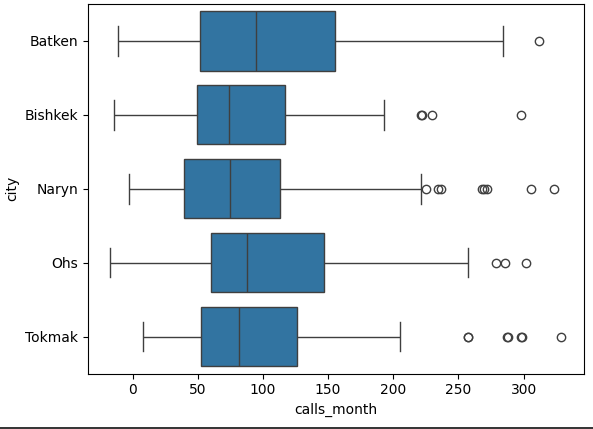

<Axes: xlabel='calls_month', ylabel='city'>

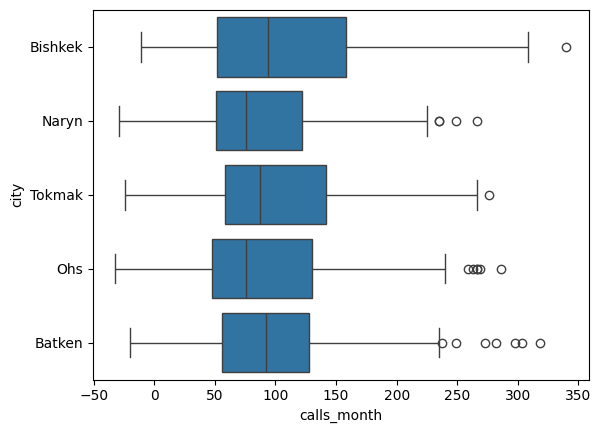

In [33]:
sns.boxplot(x = df.calls_month,y = df.city)

# Задача 2

Для созданного датасета удалите из него тех пользователей, количество звонков в месяц которых меньше, чем значение первого квартиля по данной колонке. Сохраните данный датасет в новую переменную!

In [ ]:
# your code

In [39]:
df_mod = df[df.calls_month > df.calls_month.quantile(0.25)]

# Задача 3

Отсортируйте новый датасет по колонке Баланс и выведите по ней топ 10 клиентов! Какой у них средний возраст?

In [ ]:
# your code

In [46]:
df.sort_values('balance', ascending = False).head(10).age.mean()

62.6

# Задача 4

Давайте загрузим реальный датасет по недвижке, который является частью данных, которые мы спарсили с досок объявлений.

Имя файла 'land_bishkek.csv'

In [47]:
!wget 'https://www.dropbox.com/scl/fi/jd1wrmkxvz7fn3x92fcwd/land_bishkek.csv?rlkey=1t7xlcvq2wetup1jth9e94i3m&dl=0'

--2024-01-26 14:38:12--  https://www.dropbox.com/scl/fi/jd1wrmkxvz7fn3x92fcwd/land_bishkek.csv?rlkey=1t7xlcvq2wetup1jth9e94i3m&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc148068db10c1aff73e3fbff94f.dl.dropboxusercontent.com/cd/0/inline/CMGulwdwTACHSxoYA0W1wkN6FcXPFNqOepcXmsFuPXLb7pQ2pt9DYCBDDeZR8qLkq9fJqlDcR-9XlTLwwfSlCshMqyp0BaSS1jtSxncANM7sgZE17OcR6e8OMGLpMUDMevvDniAUlw9MQ-YqitiYBCqX/file# [following]
--2024-01-26 14:38:13--  https://uc148068db10c1aff73e3fbff94f.dl.dropboxusercontent.com/cd/0/inline/CMGulwdwTACHSxoYA0W1wkN6FcXPFNqOepcXmsFuPXLb7pQ2pt9DYCBDDeZR8qLkq9fJqlDcR-9XlTLwwfSlCshMqyp0BaSS1jtSxncANM7sgZE17OcR6e8OMGLpMUDMevvDniAUlw9MQ-YqitiYBCqX/file
Resolving uc148068db10c1aff73e3fbff94f.dl.dropboxusercontent.com (uc148068db10c1aff73e3fbff94f.dl.dropboxusercontent.com)... 162.125.5.1

In [48]:
df = pd.read_csv('land_bishkek.csv?rlkey=1t7xlcvq2wetup1jth9e94i3m&dl=0')

In [49]:
df.head()

,address,price,area,oblast
0,"бишкек, кустанайская",45500.0,240.0,1.0
1,"бишкек, рухий мурас ж/м, рухий-мурас 5-я",50000.0,0.0,1.0
2,"бишкек, ак-ордо ж/м, белек",37000.0,500.0,1.0
3,"бишкек, восточная 5",30000.0,700.0,1.0
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",54000.0,300.0,1.0


In [50]:
df.oblast.unique()

array([1., 2.])

Нам следует посмотреть на его структуру, выяснить типы данных по колонкам, проверить пропуски, уникальные значения итд.. Посмотрим и обсудим!

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   address  400 non-null    object 
 1   price    399 non-null    float64
 2   area     400 non-null    float64
 3   oblast   400 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


Почистим пропуски, нули в важных фичах.

In [61]:
df = df[df.price.notnull()]

In [62]:
df = df[df.area != 0]

# Задача 5

Обычно цена, которая указывается в объявлении завышена. Для пущей уверенности давайте снизим ее на 5%

In [65]:
df.price = df.price*0.95

# Задача 6

Цена, конечно, это хорошо, но не всегда она информативна для понимания рынка. Давайте создадим новую колонку 'pr_sq', в которой будет указана стоимость одной сотки участка. Площадь участка в датасете представлена в квадратных метрах. 1 сотка - это 100 квадратных метров.

Важно учесть, что если в колонке площади есть пропуски или нули, то это может испортить данные. Давайте сперва выкинем из датасета такие строки, где не указана площадь.

Есть ли рзличия в стоимости земли в регионе 1 и регионе 2?

In [69]:
df['pr_sq'] = df.price/(df.area/100)

In [73]:
df.loc[df.oblast == 1,'pr_sq'].median()

9025.0

In [72]:
df.loc[df.oblast == 2,'pr_sq'].median()

1005.8823529411765

<Axes: xlabel='pr_sq', ylabel='oblast'>

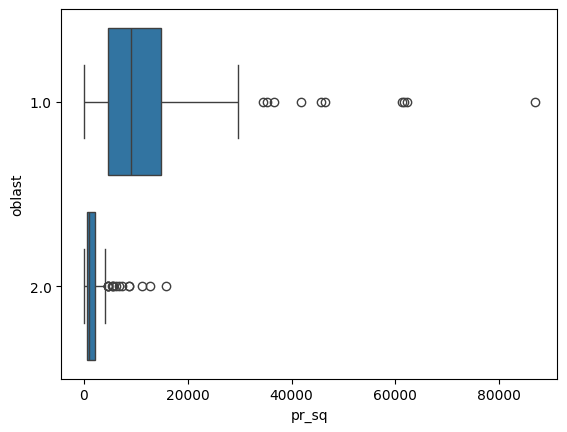

In [75]:
sns.boxplot(x = df.pr_sq, y = df.oblast.astype(str))

<Axes: xlabel='pr_sq', ylabel='Density'>

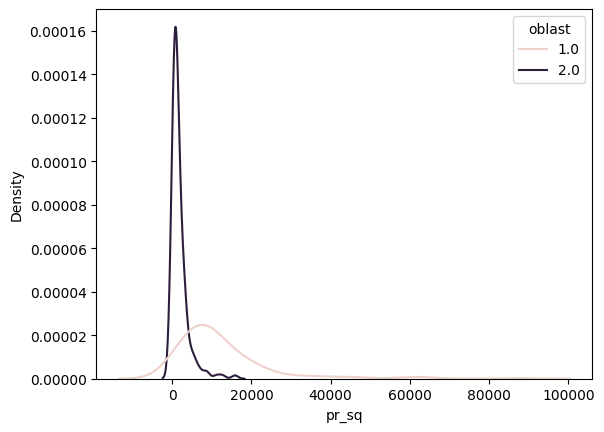

In [76]:
sns.kdeplot(data = df, x = 'pr_sq', hue = 'oblast')

# Задача 7

В датасете есть колонка с адресом. Давайте создадим колонку с названием города\села и ее содержимое достанем из колонки адреса. Новую колонку назовем 'locality'

In [79]:
df.head()

,address,price,area,oblast,pr_sq
0,"бишкек, кустанайская",43225.0,240.0,1.0,18010.416667
2,"бишкек, ак-ордо ж/м, белек",35150.0,500.0,1.0,7030.000000
3,"бишкек, восточная 5",28500.0,700.0,1.0,4071.428571
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",51300.0,300.0,1.0,17100.000000
5,"бишкек, кок-жар ж/м",42750.0,400.0,1.0,10687.500000


In [91]:
df['city'] = df.address.map(lambda i: i.split(', ')[0].replace('c. ','').title())

In [93]:
df.head()

,address,price,area,oblast,pr_sq,city
0,"бишкек, кустанайская",43225.0,240.0,1.0,18010.416667,Бишкек
2,"бишкек, ак-ордо ж/м, белек",35150.0,500.0,1.0,7030.000000,Бишкек
3,"бишкек, восточная 5",28500.0,700.0,1.0,4071.428571,Бишкек
4,"бишкек, кызыл-аскер ж/м, кумарыкская 40 а",51300.0,300.0,1.0,17100.000000,Бишкек
5,"бишкек, кок-жар ж/м",42750.0,400.0,1.0,10687.500000,Бишкек


# Задача 8

Если в названии населенного пункта присутствует "с." - то это село. Если не присутствует, то это город. Необходимо создать колонку 'type', в которой в зависимости от типа населенного города будут два значения: 'сity' или 'village'.

Покажите графически различия (если они есть) в стоимости земли в селе и городе.

# Задача 9

Самое время поговорить об оутлаерах или выбросах. Очевидно, что не все данные заполняются корректно в силу человеческого фактора. В них могут присутствовать экстремальные значения, которые можно и нужно удалить применяя статистические функции. Самой распространенной методикой является удаление по перцентилям - по 2.5 - 5 % с каждой стороны.

Давайте повыкидываем "хвосты" по 3 %, но только не для всего датасета, а по регионам. Само собой разумеется, что слишком маленькая стоимость участка для бишкека не будет ситаться таковой для села Ошской области..))

После проведенных операций давайте оценим, как уменьшился наш датасет!